## Imports

In [1]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio statsmodels --python 3.11
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_cholesterol = pd.read_csv("./dataset/colesterol.csv")

## Preparação do dataframe

In [3]:
# checar estrutura do dataset
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# checar primeiros registros
df_cholesterol.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,6,B,Não,Baixo,68.0,66.8,170.0,185.31
6,7,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,8,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,9,O,Não,Baixo,62.0,81.3,166.0,235.30
9,10,B,Sim,Alto,44.0,32.7,165.0,97.79


In [5]:
# Remover coluna Id
df_cholesterol.drop(columns=['Id'], inplace=True, axis=1)

In [6]:
# Transformar nome das colunas
df_cholesterol.columns = [
  'grupo_sanguineo',
  'fumante',
  'nivel_atividade_fisica',
  'idade',
  'peso',
  'altura',
  'colesterol',
]

In [7]:
# Copiar o dataframe DF de EDA
df_cholesterol_eda = df_cholesterol.copy()

In [8]:
# Copiar o dataframe DF de Bucketing
df_cholesterol_bucketing = df_cholesterol.copy()

## EDA

### Tratamento dos dados

In [9]:
# Detectar valores únicos da coluna grupo_sanguineo
df_cholesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [10]:
# Detectar valores únicos da coluna nivel_atividade_fisica
df_cholesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [11]:
# Detectar valores ausentes
df_cholesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
colesterol                0
dtype: int64

In [12]:
# Medidas estatísticas do DF de variáveis numéricas
# Identificar se há valores outliers
# Usar média se não houver outliers
# Usar mediana se houver outliers
df_cholesterol_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


Podemos usar mediana nos 3 casos
- Idade = média e mediana estão próximos, faz mas sentido usar valor inteiro
- Peso = possível valor outlier (peso mínimo de 15kg)
- Altura = média e mediana estão próximos, faz mas sentido usar valor inteiro

In [13]:
# Medidas estatísticas do DF de variáveis categóricas
df_cholesterol_eda.describe(include='object')

,grupo_sanguineo,fumante,nivel_atividade_fisica
count,996,997,996
unique,4,2,3
top,O,Não,Baixo
freq,323,631,426


In [14]:
# Coletar medidas (moda) das variáveis categóricas
moda_grupo_sanguineo = df_cholesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_cholesterol_eda.fumante.mode()
moda_nivel_atividade_fisica = df_cholesterol_eda.nivel_atividade_fisica.mode()

In [15]:
# Coletar medidas (mediana) das variáveis numéricas
mediana_idade = df_cholesterol_eda.idade.median()
mediana_peso = df_cholesterol_eda.peso.median()
mediana_altura = df_cholesterol_eda.altura.median()

In [16]:
# Inputar valores ausentes no DF de EDA
df_cholesterol_eda.fillna(value={
    'grupo_sanguineo': moda_grupo_sanguineo[0],
    'fumante': moda_fumante[0],
    'nivel_atividade_fisica': moda_nivel_atividade_fisica[0],
    'idade': mediana_idade,
    'peso': mediana_peso,
    'altura': mediana_altura,
}, inplace=True)

In [17]:
# Verificar se ainda há valores ausentes no DF de EDA
df_cholesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
colesterol                0
dtype: int64

In [18]:
# Mudar tipo da variável idade e altura para int
df_cholesterol_eda.idade = df_cholesterol_eda.idade.astype(int)
df_cholesterol_eda.altura = df_cholesterol_eda.altura.astype(int)

In [19]:
# Nova estrutura do DF de EDA
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   colesterol              1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [20]:
# Verificar primeiros registros do DF de EDA
df_cholesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


### Tratamento de outliers

<Axes: xlabel='idade'>

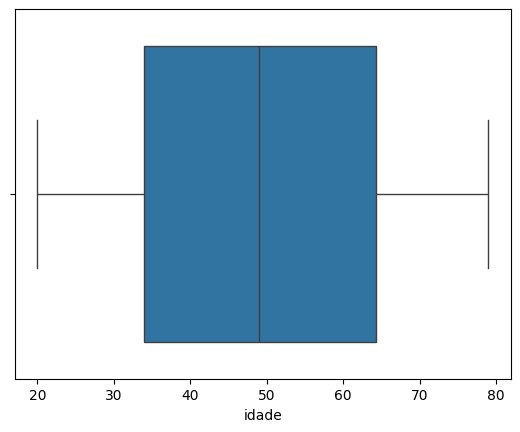

In [21]:
# Verificar outliers na variável idade
sns.boxplot(data=df_cholesterol_eda, x='idade')

Não há outliers na variável de idade

<Axes: xlabel='peso'>

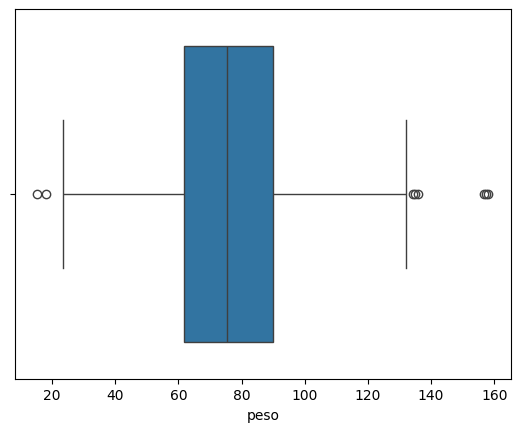

In [22]:
# Verificar outliers na variável peso
sns.boxplot(data=df_cholesterol_eda, x='peso')

Temos valores outliers para baixo e muitos valores para cima na variável peso

In [23]:
# Filtrar registros com peso menor que 40kg para serem removidos
df_cholesterol_eda[df_cholesterol_eda.peso < 40].peso.count()

np.int64(37)

In [24]:
# Remover público do DF de EDA
df_cholesterol_eda.drop(df_cholesterol_eda[df_cholesterol_eda.peso < 40].index, inplace=True, axis=0)

<Axes: xlabel='peso'>

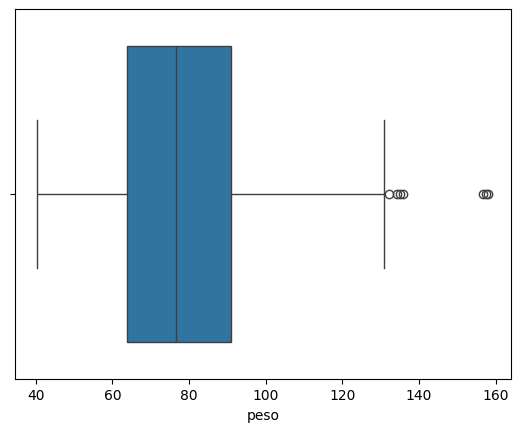

In [25]:
# Novo boxplot da variável peso
sns.boxplot(data=df_cholesterol_eda, x='peso')

<Axes: xlabel='altura'>

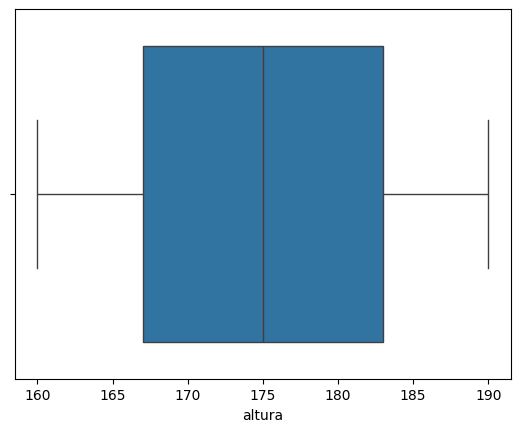

In [26]:
# Verificar outliers na variável peso
sns.boxplot(data=df_cholesterol_eda, x='altura')

Não há valores outliers para a variável altrura

<Axes: xlabel='colesterol'>

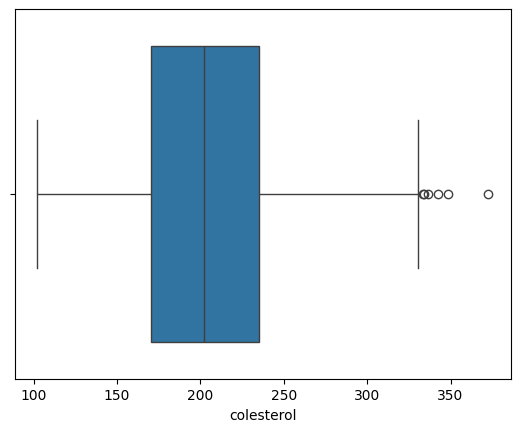

In [27]:
# Verificar outliers na variável colesterol
sns.boxplot(data=df_cholesterol_eda, x='colesterol')

Há valores outliers para cima no nível de colesterol, porém são valores esperados para este dataframe

### Cruzamento de variáveis categóricas com target

<Axes: xlabel='grupo_sanguineo', ylabel='colesterol'>

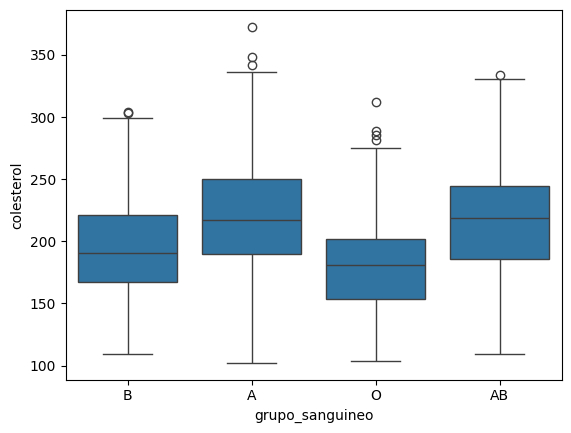

In [28]:
# Cruzamento de variáveis
# grupo_sanguineo x colesterol
sns.boxplot(data=df_cholesterol_eda, x='grupo_sanguineo', y='colesterol')

<Axes: xlabel='fumante', ylabel='colesterol'>

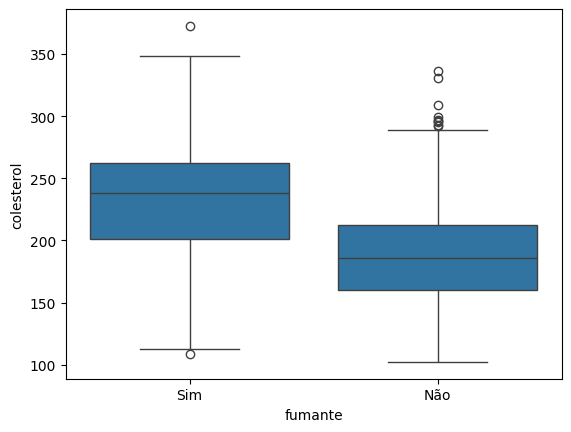

In [29]:
# Cruzamento de variáveis
# fumante x colesterol
sns.boxplot(data=df_cholesterol_eda, x='fumante', y='colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='colesterol'>

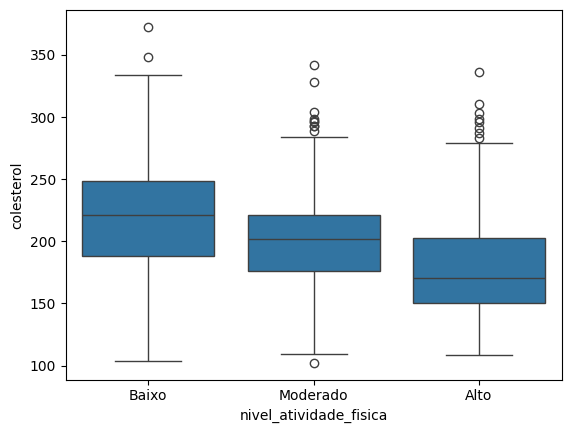

In [30]:
# Cruzamento de variáveis
# nivel_atividade_fisica x colesterol
sns.boxplot(data=df_cholesterol_eda, x='nivel_atividade_fisica', y='colesterol')

### Cruzamento variáveis numéricas com target

<Axes: xlabel='idade', ylabel='colesterol'>

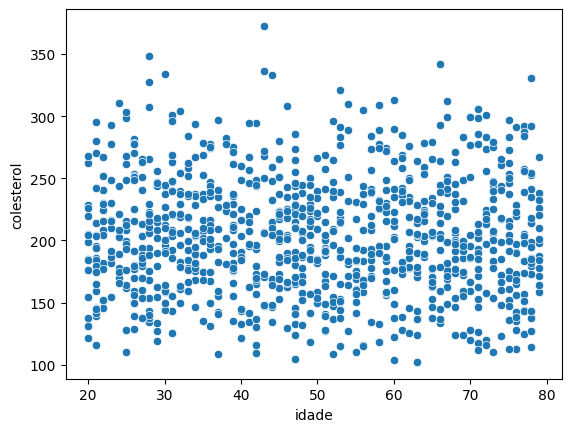

In [31]:
# Cruzamento de variáveis
# idade x colesterol
sns.scatterplot(data=df_cholesterol_eda, x='idade', y='colesterol')

<Axes: xlabel='peso', ylabel='colesterol'>

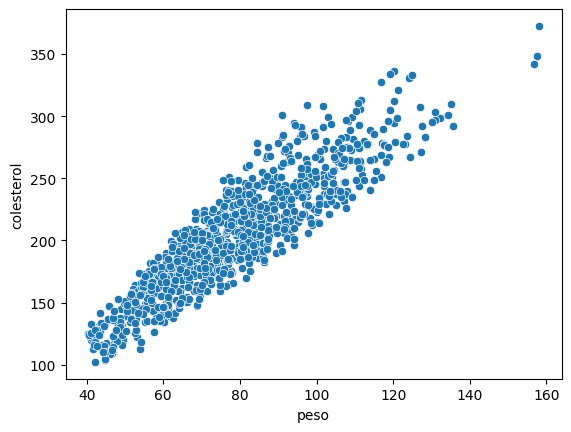

In [32]:
# Cruzamento de variáveis
# peso x colesterol
sns.scatterplot(data=df_cholesterol_eda, x='peso', y='colesterol')

<Axes: xlabel='altura', ylabel='colesterol'>

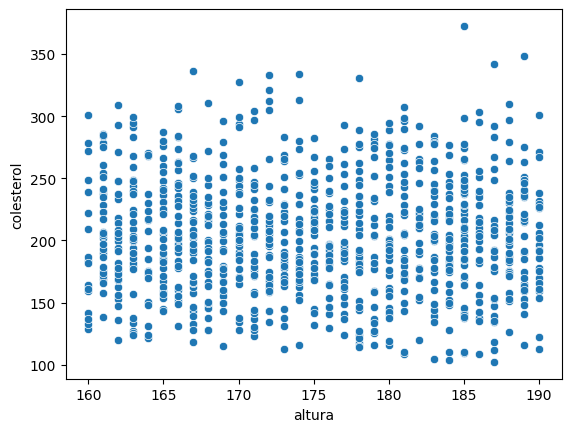

In [33]:
# Cruzamento de variáveis
# altura x colesterol
sns.scatterplot(data=df_cholesterol_eda, x='altura', y='colesterol')

### Distribuição das variáveis numéricas

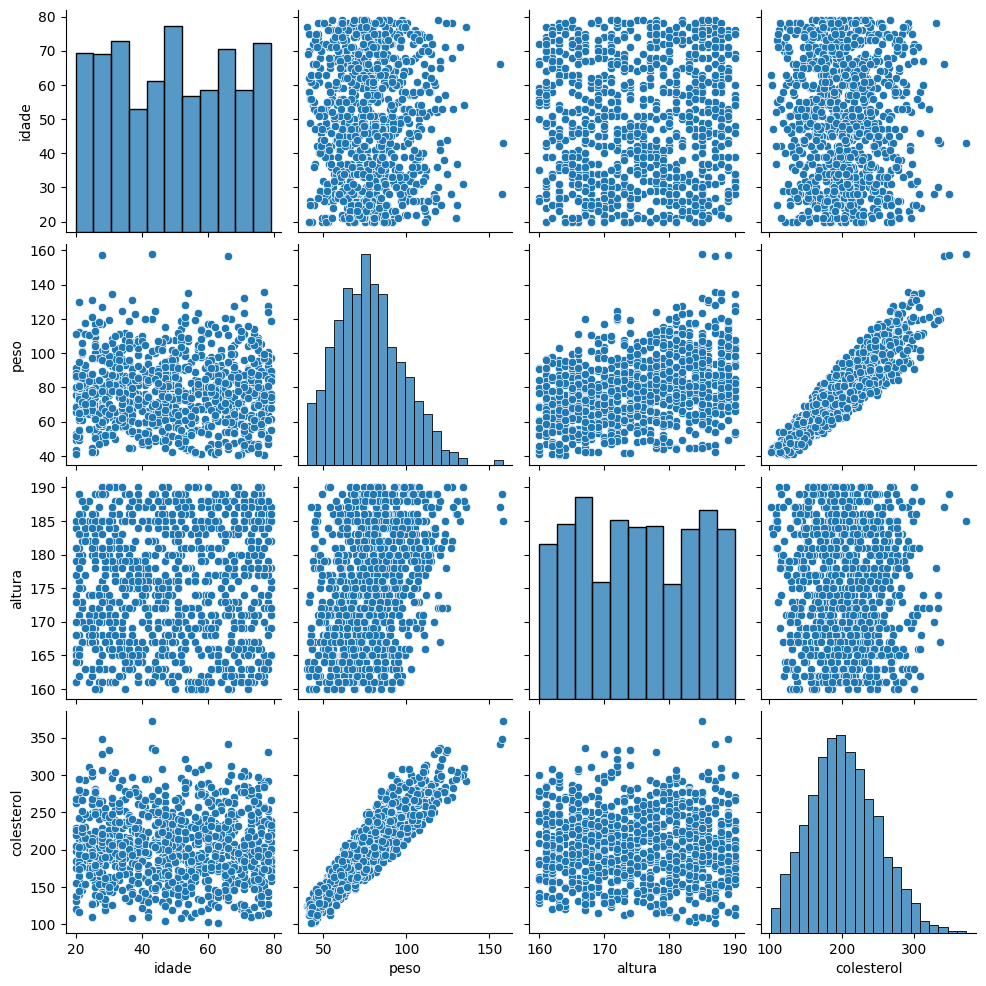

In [34]:
# Criar distribuição das variáveis numéricas
sns.pairplot(data=df_cholesterol_eda, vars=['idade', 'peso', 'altura', 'colesterol'])

### Análise de correlação

In [35]:
# Converter variáveis categóricas nominais em numéricas, usando one-hot encoding do pandas
df_cholesterol_eda = pd.get_dummies(df_cholesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [36]:
df_cholesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [37]:
# Converter variáveis categóricas ordinais em numéricas, usando factorize do pandas
df_cholesterol_eda.nivel_atividade_fisica = pd.factorize(df_cholesterol_eda.nivel_atividade_fisica)[0] + 1

In [38]:
df_cholesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

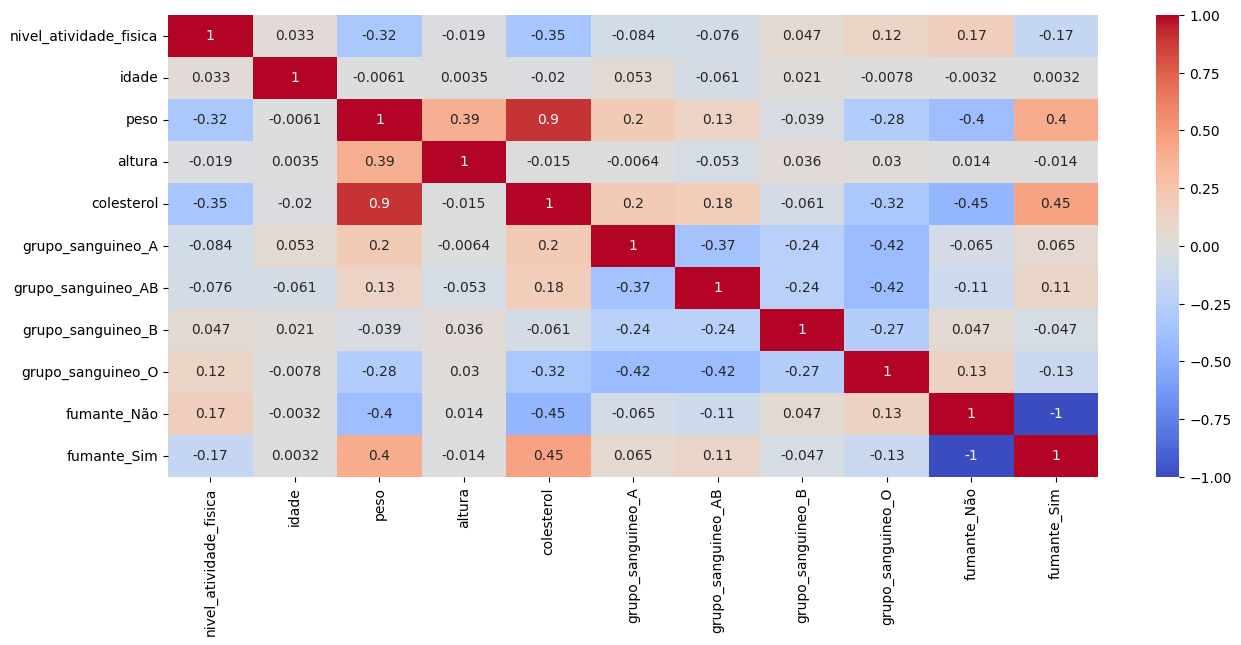

In [39]:
# Mapa de calor das correlações entre as variáveis
plt.figure(figsize=(15, 6))
sns.heatmap(data=df_cholesterol_eda.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

<Axes: >

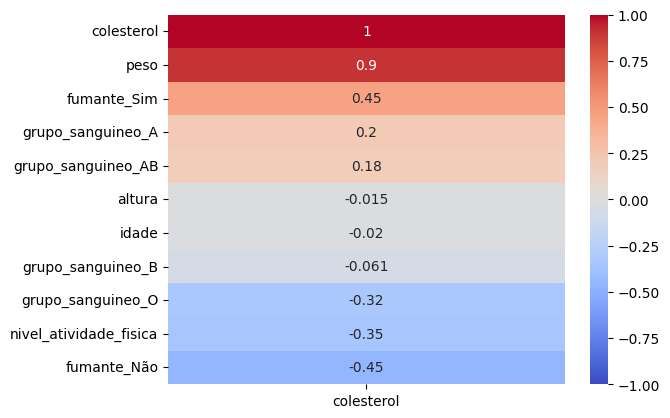

In [40]:
# Formato de ranking, somente correlação com váriavel target
sns.heatmap(
  data=df_cholesterol_eda.corr()[['colesterol']].sort_values(by='colesterol', ascending=False),
  vmin=-1,
  vmax=1,
  annot=True,
  cmap='coolwarm',
)

### Bucketing

In [41]:
# Bucketing idade
bins_idade = [20, 30, 40, 50 , 60, 70, 80]
labels_idade = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df_cholesterol_bucketing['escala_idade'] = pd.cut(x = df_cholesterol_bucketing['idade'], bins=bins_idade, labels=labels_idade, include_lowest=True)

In [42]:
df_cholesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-40
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-70
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-30
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-50
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-80
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-70
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-60
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-40
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-70
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-50


<Axes: xlabel='escala_idade', ylabel='colesterol'>

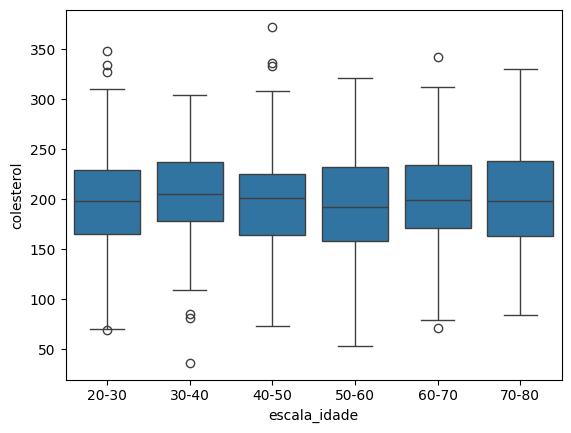

In [43]:
sns.boxplot(data=df_cholesterol_bucketing, x='escala_idade', y='colesterol')

In [44]:
# Bucketing peso
bins_peso = [40, 50, 60, 70 , 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160']
df_cholesterol_bucketing['escala_peso'] = pd.cut(x = df_cholesterol_bucketing['peso'], bins=bins_peso, labels=labels_peso, include_lowest=True)

<Axes: xlabel='escala_peso', ylabel='colesterol'>

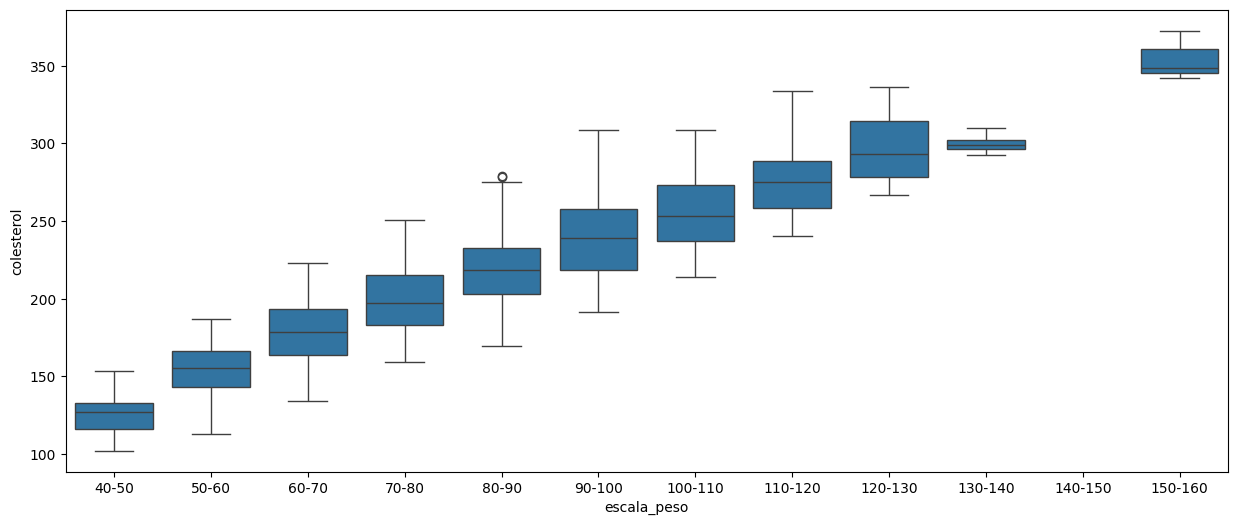

In [45]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cholesterol_bucketing, x='escala_peso', y='colesterol')

## Treinamento do modelo

### Preparação do dataset

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [47]:
df_cholesterol.drop(df_cholesterol[df_cholesterol.peso < 40].index, inplace=True, axis=0)

In [48]:
# Define X e y
# X possui somente as variáveis independentes
# y possui somente a variável dependente
X = df_cholesterol.drop(columns=['colesterol'], axis=1)
y = df_cholesterol.colesterol

In [49]:
# Split do dataset em treino e teste 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [50]:
# Verificar quantidade de registros em teste
X_test.shape

(289, 6)

### Pipeline

In [51]:
# Imputar moda nas variaveis categóricas - grupo_sanguineo, fumante, nivel_atividade_fisica
# Padronizar variáveis numéricas - idade, peso, altura
# Imputar mediana nas variáveis numéricas - idade, peso, altura
# One-hot encoding nas variáveis categóricas nominais - grupo_sanguineo, fumante
# Ordinal encoding nas variáveis categóricas ordinais - nivel_atividade_fisica

# Nome das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_ordinais = ['nivel_atividade_fisica']
colunas_numericas = ['idade', 'peso', 'altura']

In [52]:
# Criar transformer de categóricas
transformer_categorias = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [53]:
# Criar transformer de ordinais
transformer_ordinais = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error')),
])

In [54]:
# Criar transformer de numéricas
transformer_numericas = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler()),
])

In [55]:
# Criar um column transformer que encapsula todas as transformações
pre_processor = ColumnTransformer(transformers=[
  ('cat', transformer_categorias, colunas_categoricas),
	('ord', transformer_ordinais, colunas_ordinais),
	('num', transformer_numericas, colunas_numericas),
])

In [56]:
# Criar um pipeline principal que encapsula o pre-processamento e o treinamento do modelo de regressão linear
model_reg = Pipeline(steps=[
	('preprocessor', pre_processor),
	('regressor', LinearRegression()),
])

In [57]:
# Treinar o modelo
model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso',
                                                   'altura'])])),
                ('regressor', LinearRegression())])

## Análise do modelo

### Análise de métricas

In [58]:
# Gerar predições
y_pred = model_reg.predict(X_test)

In [59]:
# Calcular r2_score
# Quanto mais próximo de 1, melhor o modelo
r2_score(y_test, y_pred)

0.9596866717336213

In [60]:
# Calcular MAE (mean absolute error)
# Quanto menor, melhor o modelo
mean_absolute_error(y_test, y_pred)

np.float64(7.305541738754324)

In [61]:
# Calcular RMSE (root mean squared error)
# Quanto menor, melhor o modelo
mean_squared_error(y_test, y_pred, squared=False)

/Users/igcruz/.local/share/virtualenvs/multiple_linear_regression-VyJKLGrd/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(9.068274118707217)

In [62]:
# Calcular RMSE (root mean squared error) com método novo
root_mean_squared_error(y_test, y_pred)

np.float64(9.068274118707217)

### Análise de resíduos

In [63]:
# Calcular resíduos
residuos = y_test - y_pred

In [64]:
# Transformar resíduos em escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

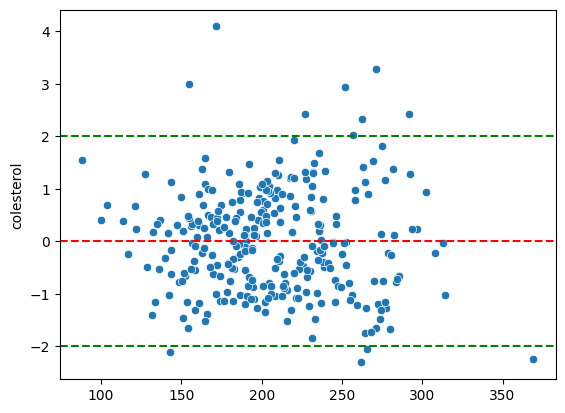

In [65]:
# Verificar linearidade dos resíduos: Valores entre -2 e 2 (Escala padrão)
# Verificar homocedasticidade dos resíduos: Valores entre -2 e 2 são considerados aceitáveis
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='g', linestyle='--')
plt.axhline(y=-2, color='g', linestyle='--')

In [72]:
# Checar se os resíduos seguem uma distribuição normal
# QQ plot
# import pingouin as pg
# plt.figure(figsize=(15, 6))
# pg.qqplot(residuos_std, dist='norm', confidence=0.95)
# plt.xlabel('Quantis teóricos')
# plt.ylabel('Resíduos na escala padrão')
# plt.show()

In [68]:
# Teste de normalidade dos resíduos - Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

stat_shapiro, p_valor_shapiro = shapiro(residuos)
print("Estatstica do Teste: {} e P-valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatstica do Teste: 0.9808602987983549 e P-valor: 0.0006504357474438688


In [69]:
# Teste de Kolmogorov-Smirnov
stat_kstest, p_valor_kstest = kstest(residuos, 'norm')
print("Estatstica do Teste: {} e P-value: {}".format(stat_kstest, p_valor_kstest))

Estatstica do Teste: 0.4301039713469809 e P-value: 4.433270912860652e-49


In [71]:
# Teste de Lilliefors
stat_ll, p_valor_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatstica do Teste: {} e P-value: {}".format(stat_ll, p_valor_ll))

Estatstica do Teste: 0.0435108880190227 e P-value: 0.2643879577921711


In [75]:
# Teste de Anderson-Darling
stat_and, critical_and, significance_and = anderson(residuos, dist='norm')
print(critical_and)
print(significance_and)
print("Estatistica do Teste: {} e Níveis Críticos: {}".format(stat_and, critical_and[2]))

[0.568 0.647 0.776 0.906 1.077]
[15.  10.   5.   2.5  1. ]
Estatistica do Teste: 0.8407279936882333 e Níveis Críticos: 0.776


3 dos testes (Shapiro, Kolmogorov e Anderson) apresentam que os resíduos não possuem uma distribuição normal

In [78]:
# Teste de Homocedasticidade de Goldfeld-Quandt
# É necessário tratar os resíduos antes de aplicar o teste
pipe = Pipeline(steps=[('preprocessor', pre_processor)])
X_test_transformed = pipe.fit_transform(X_test)
X_test_transformed

array([[ 0.        ,  1.        ,  0.        , ..., -1.44340738,
         0.22608781, -0.58669129],
       [ 0.        ,  0.        ,  0.        , ...,  1.28157488,
        -1.20886474, -1.05685776],
       [ 0.        ,  0.        ,  1.        , ..., -1.10973608,
        -0.84754575, -0.35160806],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.00250157,
        -1.09014564, -1.52702423],
       [ 1.        ,  0.        ,  0.        , ...,  0.28056099,
         0.17447081, -0.35160806],
       [ 0.        ,  0.        ,  0.        , ...,  0.72545605,
        -1.65277092, -1.17439938]])

In [79]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print("Estatistica do Teste: {} e P-value: {}".format(stat_goldfeld, p_value_goldfeld))

Estatistica do Teste: 0.671046872901413 e P-value: 0.9895313415817901


Para realizar esse teste, é necessário preparar os dados, incluindo os resíduos e as variáveis independentes. Como usamos um pipeline de pré-processamento, precisamos criar um novo pipeline apenas com esse passo. Em seguida, aplicamos o pipeline aos dados de teste e executamos o teste de Goldfeld-Quandt. Os resultados mostraram que não podemos rejeitar a hipótese nula, indicando que os resíduos têm variância homogênea em relação às variáveis independentes. Isso é um bom sinal para o modelo.

### Realizar predições individuais

In [89]:
individual_prediction = {
  'grupo_sanguineo': 'AB',
	'fumante': 'Não',
	'nivel_atividade_fisica': 'Baixo',
	'idade': 26,
	'peso': 96,
	'altura': 187,
}
sample_df = pd.DataFrame(individual_prediction, index=[1])

In [81]:
sample_df

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura
1,O,Não,Alto,40,70,180


In [90]:
# Predição
model_reg.predict(sample_df)

array([219.765625])

In [91]:
import joblib as jb
jb.dump(model_reg, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']